<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">🩺 Projet 4 – Étude de santé publique </h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analyse des causes de la sous-nutrition mondiale (2013–2018)
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Ce notebook a pour objectif d’analyser la **disponibilité alimentaire mondiale** et les **facteurs associés à la sous-nutrition**, à travers plusieurs étapes de traitement et de visualisation de données.


---

## 📖 Sommaire

[1 – Importation des librairies et chargement des fichiers](#etape1)
   - [1.1 - Importation des librairies](#etape1_1)
   - [1.2 - Chargement des fichiers Excel](#etape1_2)

[2 - Analyse exploratoire des fichiers](#etape2)
   - [2.1 - Analyse exploratoire du fichier population](#etape2_1)
   - [2.2 - Analyse exploratoire du fichier disponibilité alimentaire](#etape2_2)
   - [2.3 - Analyse exploratoire du fichier aide alimentaire](#etape2_3)
   - [2.4 - Analyse exploratoire du fichier sous nutrition](#etape2_4)

[3 – Analyse de la sous-nutrition](#etape3)
   - [3.1 - Proportion de personnes en sous nutrition](#etape3_1)
   - [3.2 - Nombre théorique de personnes qui pourraient être nourries](#etape3_2)
   - [3.3 - Nombre théorique de personnes nourries avec les produits végétaux](#etape3_3)
   - [3.4 - Utilisation de la disponibilité intérieure](#etape3_4)
   - [3.5 - Utilisation des céréales](#etape3_5)
   - [3.6 - Pays avec la proportion de personnes sous-alimentées la plus forte en 2017](#etape3_6)
   - [3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013](#etape3_7)
   - [3.8 - Évolution des 5 pays ayant le plus bénéficié d'aide alimentaire entre 2013 et 2016](#etape3_8)
   - [3.9 - Pays avec le moins de disponibilité par habitant](#etape3_9)
   - [3.10 - Pays avec le plus de disponibilité par habitant](#etape3_10)
   - [3.11 - Exemple de la Thaïlande pour le Manioc](#etape3_11)

[4 - Taux moyen de sous-nutrition par continent](#etape4)
   - [4.1 - Taux moyen de sous-nutrition par continent](#etape4_1)
   - [4.2 - Évolution de la sous-nutrition (2013–2018)](#etape4_2)
   - [4.3 - Corrélation apport calorique / sous-nutrition](#etape4_3)

[5 - Conclusion](#conclusion)



---

🧩 **Langage :** Python  
📊 **Librairies principales :** pandas, matplotlib, numpy  
📁 **Fichiers utilisés :**  
- `dispo_alimentaire.csv`  
- `population.csv`  
- `sous_nutrition.csv`  

<a id="etape1"></a>
<div style="background-color: RGB(0,150,250);">
  <h2 style="margin: auto; padding: 20px; color:#fff;">
    Étape 1 - Importation des librairies et chargement des fichiers
  </h2>
</div>

<a id="etape1_1"></a>
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    1.1 - Importation des librairies
  </h3>
</div>

In [504]:
# Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<a id="etape1_2"></a>
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    1.2 - Chargement des fichiers Excel
  </h3>
</div>

In [505]:
#Importation du fichier population.csv
population = pd.read_csv("data/population.csv")

#Importation du fichier dispo_alimentaire.csv
dispo = pd.read_csv("data/dispo_alimentaire.csv")

#Importation du fichier aide_alimentaire.csv
aide = pd.read_csv("data/aide_alimentaire.csv")

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv("data/sous_nutrition.csv")

<a id="etape2"></a>
<div style="background-color: RGB(0,150,250);">
  <h2 style="margin: auto; padding: 20px; color:#fff;">
    Étape 2 - Analyse exploratoire des fichiers
  </h2>
</div>

<a id="etape2_1"></a>
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    2.1 - Analyse exploratoire du fichier population
  </h3>
</div>

In [506]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [507]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

# Informations sur le fichier population.csv
print("\nPopulation :")
print(population.info())
print(population.describe())

# Informations sur dispo_alimentaire.csv
print("\nDisponibilité alimentaire :")
print(dispo.info())
print(dispo.describe())

# Informations sur aide_alimentaire.csv
print("\nAide alimentaire :")
print(aide.info())
print(aide.describe())

# Informations sur sous_nutrition.csv
print("\nSous-nutrition :")
print(sous_nutrition.info())
print(sous_nutrition.describe())


Population :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
None
       Année    Valeur
count  1,416     1,416
mean   2,016    31,448
std        2   130,081
min    2,013         1
25%    2,014       378
50%    2,016     5,126
75%    2,017    19,307
max    2,018 1,427,648

Disponibilité alimentaire :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   P

In [508]:
#Affichage les 5 premières lignes de la table

# Affichage du fichier population.csv
print("Population :")
display(population.head())

# Affichage du fichier dispo_alimentaire.csv
print("Disponibilité alimentaire :")
display(dispo.head())

# Affichage du fichier aide_alimentaire.csv
print("Aide alimentaire :")
display(aide.head())

# Affichage du fichier sous_nutrition.csv
print("Sous-nutrition :")
display(sous_nutrition.head())

Population :


,Zone,Année,Valeur
0,Afghanistan,2013,"32,270"
1,Afghanistan,2014,"33,371"
2,Afghanistan,2015,"34,414"
3,Afghanistan,2016,"35,383"
4,Afghanistan,2017,"36,296"


Disponibilité alimentaire :


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5,2,0,1,53,NaN,NaN,53,NaN,53,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1,1,0,0,41,2,40,39,2,3,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1,0,0,0,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4,3,0,0,82,NaN,82,82,NaN,NaN,NaN,NaN,NaN


Aide alimentaire :


,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


Sous-nutrition :


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [509]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000

# Multiplication de la colonne valeur par 1000
population["Valeur"] = population["Valeur"] * 1000
display(population.head())

,Zone,Année,Valeur
0,Afghanistan,2013,"32,269,589"
1,Afghanistan,2014,"33,370,794"
2,Afghanistan,2015,"34,413,603"
3,Afghanistan,2016,"35,383,032"
4,Afghanistan,2017,"36,296,113"


In [510]:
#Changement du nom de la colonne Valeur par Population
population = population.rename(columns={"Valeur": "Population"})

In [511]:
#Affichage les 5 premières lignes de la table pour voir les modifications
display(population.head())

,Zone,Année,Population
0,Afghanistan,2013,"32,269,589"
1,Afghanistan,2014,"33,370,794"
2,Afghanistan,2015,"34,413,603"
3,Afghanistan,2016,"35,383,032"
4,Afghanistan,2017,"36,296,113"


<a id="etape2_2"></a>
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    2.2 - Analyse exploratoire du fichier disponibilité alimentaire
  </h3>
</div>

In [512]:
#Afficher les dimensions du dataset
print("Dimensions du dataset :", dispo.shape)

Dimensions du dataset : (15605, 18)


In [513]:
#Consulter le nombre de colonnes
print("\nInfos sur les colonnes :")
print(dispo.info())


Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse 

In [514]:
#Affichage les 5 premières lignes de la table
print("\nAperçu du dataset :")
display(dispo.head())


Aperçu du dataset :


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5,2,0,1,53,NaN,NaN,53,NaN,53,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1,1,0,0,41,2,40,39,2,3,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1,0,0,0,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0,0,NaN,NaN,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4,3,0,0,82,NaN,82,82,NaN,NaN,NaN,NaN,NaN


In [515]:
#Remplacement des NaN dans le dataset par des 0
dispo = dispo.fillna(0)
print("\nAprès remplacement des NaN par 0 :")
display(dispo.head())


Après remplacement des NaN par 0 :


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0,0,5,2,0,1,53,0,0,53,0,53,0,0,0
1,Afghanistan,"Agrumes, Autres",vegetale,0,0,1,1,0,0,41,2,40,39,2,3,0,0,0
2,Afghanistan,Aliments pour enfants,vegetale,0,0,1,0,0,0,2,0,2,2,0,0,0,0,0
3,Afghanistan,Ananas,vegetale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,Bananes,vegetale,0,0,4,3,0,0,82,0,82,82,0,0,0,0,0


In [516]:
#Multiplication de toutes les lignes contenant des milliers de tonnes en Kg
colonnes_tonnes = [
    "Disponibilité intérieure",
    "Aliments pour animaux",
    "Semences",
    "Pertes",
    "Transformations",
    "Exportations",
    "Nourriture",
    "Autres utilisations"
]

for col in colonnes_tonnes:
    if col in dispo.columns:
        dispo[col] = dispo[col] * 1000

In [517]:
#Affichage les 5 premières lignes de la table
print("\nDataset après conversion en kg :")
display(dispo.head())


Dataset après conversion en kg :


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0,0,5,2,0,1,"53,000",0,0,"53,000",0,53,0,0,0
1,Afghanistan,"Agrumes, Autres",vegetale,0,0,1,1,0,0,"41,000",2,40,"39,000","2,000",3,0,0,0
2,Afghanistan,Aliments pour enfants,vegetale,0,0,1,0,0,0,"2,000",0,2,"2,000",0,0,0,0,0
3,Afghanistan,Ananas,vegetale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,Bananes,vegetale,0,0,4,3,0,0,"82,000",0,82,"82,000",0,0,0,0,0


<a id="etape2_3"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    2.3 - Analyse exploratoire du fichier aide alimentaire
  </h3>
</div>

In [518]:
#Afficher les dimensions du dataset
print("Dimensions du dataset :", aide.shape)

Dimensions du dataset : (1475, 4)


In [519]:
#Consulter le nombre de colonnes
print("\nInfos sur les colonnes :")
print(aide.info())


Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB
None


In [520]:
#Affichage les 5 premières lignes de la table
print("\nInfos sur les colonnes :")
print(aide.head())


Infos sur les colonnes :
  Pays bénéficiaire  Année              Produit  Valeur
0       Afghanistan   2013  Autres non-céréales     682
1       Afghanistan   2014  Autres non-céréales     335
2       Afghanistan   2013         Blé et Farin   39224
3       Afghanistan   2014         Blé et Farin   15160
4       Afghanistan   2013             Céréales   40504


In [521]:
#Changement du nom de la colonne Pays bénéficiaire par Zone
aide = aide.rename(columns={"Pays bénéficiaire": "Zone"})
# Vérification
print(aide.head())

          Zone  Année              Produit  Valeur
0  Afghanistan   2013  Autres non-céréales     682
1  Afghanistan   2014  Autres non-céréales     335
2  Afghanistan   2013         Blé et Farin   39224
3  Afghanistan   2014         Blé et Farin   15160
4  Afghanistan   2013             Céréales   40504


In [522]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide["Valeur"] = aide["Valeur"] * 1000

In [523]:
#Affichage les 5 premières lignes de la table
display(aide.head())

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<a id="etape2_4"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    2.4 - Analyse exploratoire du fichier sous nutrition
  </h3>
</div>

In [524]:
#Afficher les dimensions du dataset
print("Dimensions du dataset :", sous_nutrition.shape)

Dimensions du dataset : (1218, 3)


In [525]:
#Consulter le nombre de colonnes
print("\nInfos sur les colonnes :")
print(sous_nutrition.info())


Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB
None


In [526]:
#Afficher les 5 premières lignes de la table
print("\nInfos sur les colonnes :")
print(sous_nutrition.info())


Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB
None


In [527]:
#Conversion de la colonne sous nutrition en numérique

# Remplacer la chaîne "<0.1>" par "0.1"
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].replace("<0.1", "0.1")

# Conversion en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

# Vérification
print(sous_nutrition['Valeur'].unique()[:20])


[ 8.6  8.8  8.9  9.7 10.5 11.1  2.2  2.5  2.8  3.   3.1  3.3  0.1  1.3
  1.2  nan  7.6  6.2  5.3  5.6]


In [528]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0

# Conversion de la colonne Valeur en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')

# Remplacement des NaN par 0
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].fillna(0)

# Vérification
display(sous_nutrition.head())


,Zone,Année,Valeur
0,Afghanistan,2012-2014,9
1,Afghanistan,2013-2015,9
2,Afghanistan,2014-2016,9
3,Afghanistan,2015-2017,10
4,Afghanistan,2016-2018,10


In [529]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition =sous_nutrition.rename(columns={"Valeur": "sous_nutrition"})

In [530]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition["sous_nutrition"] = sous_nutrition["sous_nutrition"] * 1000000

In [531]:
#Afficher les 5 premières lignes de la table
display(sous_nutrition.head())

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,"8,600,000"
1,Afghanistan,2013-2015,"8,800,000"
2,Afghanistan,2014-2016,"8,900,000"
3,Afghanistan,2015-2017,"9,700,000"
4,Afghanistan,2016-2018,"10,500,000"


<a id="etape3" style="display:block; position:relative; top:-80px;"></a>
<div style="background-color: RGB(0,150,250);">
  <h2 style="margin: auto; padding: 20px; color:#fff;">
    Étape 3 - Analyse de la sous-nutrition
  </h2>
</div>

<a id="etape3_1"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    3.1 - Proportion de personnes en sous nutrition
  </h3>
</div>

In [532]:
#Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

# Filtrer population 2017
popu_2017 = population[population["Année"] == 2017][["Zone", "Année", "Population"]]
sn_2017 = sous_nutrition[sous_nutrition["Année"] == "2016-2018"][["Zone", "sous_nutrition"]]

popu_nutri = pd.merge(sn_2017, popu_2017, on="Zone", how="inner")
popu_nutri["Année"] = 2017


In [533]:
#Affichage du dataset
display(popu_nutri.head(5))

,Zone,sous_nutrition,Année,Population
0,Afghanistan,"10,500,000",2017,"36,296,113"
1,Afrique du Sud,"3,100,000",2017,"57,009,756"
2,Albanie,"100,000",2017,"2,884,169"
3,Algérie,"1,300,000",2017,"41,389,189"
4,Allemagne,0,2017,"82,658,409"


In [534]:
#Calcul et affichage du nombre de personnes en état de sous nutrition

# Calcul de la proportion de sous-nutrition par pays
popu_nutri["Proportion_sous_nutrition"] = (popu_nutri["sous_nutrition"] / popu_nutri["Population"]) * 100

# Calcul de la proportion mondiale
prop_mondiale = (popu_nutri["sous_nutrition"].sum() / popu_nutri["Population"].sum()) * 100

# Formatage du pourcentage
popu_nutri["Proportion_sous_nutrition"] = popu_nutri["Proportion_sous_nutrition"].round(2)
print(f"🌍 Proportion mondiale de sous-nutrition en 2017 : {prop_mondiale:.2f}%")

display(popu_nutri.head(10))

🌍 Proportion mondiale de sous-nutrition en 2017 : 7.13%


,Zone,sous_nutrition,Année,Population,Proportion_sous_nutrition
0,Afghanistan,"10,500,000",2017,"36,296,113",29
1,Afrique du Sud,"3,100,000",2017,"57,009,756",5
2,Albanie,"100,000",2017,"2,884,169",3
3,Algérie,"1,300,000",2017,"41,389,189",3
4,Allemagne,0,2017,"82,658,409",0
5,Andorre,0,2017,"77,001",0
6,Angola,"5,800,000",2017,"29,816,766",19
7,Antigua-et-Barbuda,0,2017,"95,426",0
8,Arabie saoudite,"1,600,000",2017,"33,101,179",5
9,Argentine,"1,500,000",2017,"43,937,140",3


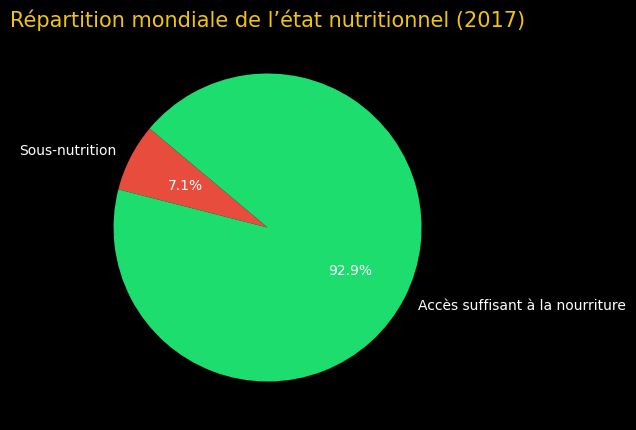

In [535]:
# Graphique

# Valeurs globales
prop_sous_nutrition = 7.13
prop_bien_nourris = 100 - prop_sous_nutrition

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(
    [prop_sous_nutrition, prop_bien_nourris],
    labels=["Sous-nutrition", "Accès suffisant à la nourriture"],
    colors=["#e74c3c", "#1cdd6d"],
    autopct='%1.1f%%',
    startangle=140,
    textprops={'color': "white"}
)
ax.set_title("Répartition mondiale de l’état nutritionnel (2017)", color="#f1c40f", fontsize=15)
plt.show()

<a id="etape3_2"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    3.2 - Nombre théorique de personne qui pourrait être nourries
  </h3>
</div>

In [536]:
#Combien mange en moyenne un être humain ? Source => FAO ≈ 2500 kcal/jour
besoin_kcal = 2500

In [537]:
#On commence par faire une jointure entre le data frame population et dispo_alimentaire afin d'ajouter dans ce dernier la population

# Filtrer la population pour 2017
popu_2017 = population[population["Année"] == 2017]

# Faire la jointure
dispo_pop = pd.merge(dispo, popu_2017, on="Zone", how="inner")


In [538]:
#Affichage du nouveau dataframe
display(dispo_pop.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0,0,5,2,0,1,"53,000",0,0,"53,000",0,53,0,0,0,2017,"36,296,113"
1,Afghanistan,"Agrumes, Autres",vegetale,0,0,1,1,0,0,"41,000",2,40,"39,000","2,000",3,0,0,0,2017,"36,296,113"
2,Afghanistan,Aliments pour enfants,vegetale,0,0,1,0,0,0,"2,000",0,2,"2,000",0,0,0,0,0,2017,"36,296,113"
3,Afghanistan,Ananas,vegetale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017,"36,296,113"
4,Afghanistan,Bananes,vegetale,0,0,4,3,0,0,"82,000",0,82,"82,000",0,0,0,0,0,2017,"36,296,113"


In [539]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
dispo_pop["dispo_kcal"] = dispo_pop["Disponibilité alimentaire (Kcal/personne/jour)"] * dispo_pop["Population"] * 365

# Somme mondiale
total_kcal = dispo_pop["dispo_kcal"].sum()
print("Total des kcal disponibles mondialement en 2017 :", total_kcal, "milliards de kcal.")
print("Soit environ", round(total_kcal/1e12, 2), "mille milliards de kcal.")

Total des kcal disponibles mondialement en 2017 : 7635429388975815.0 milliards de kcal.
Soit environ 7635.43 mille milliards de kcal.


In [540]:
#Calcul du nombre d'humains pouvant être nourris
nb_humains_nourris = total_kcal / (besoin_kcal * 365)  # sur une année
print("Nombre théorique d’humains pouvant être nourris en 2017 :", int(nb_humains_nourris))
print("Soit environ", round(nb_humains_nourris/1e6, 2), "millions de personnes.")

Nombre théorique d’humains pouvant être nourris en 2017 : 8367593850
Soit environ 8367.59 millions de personnes.


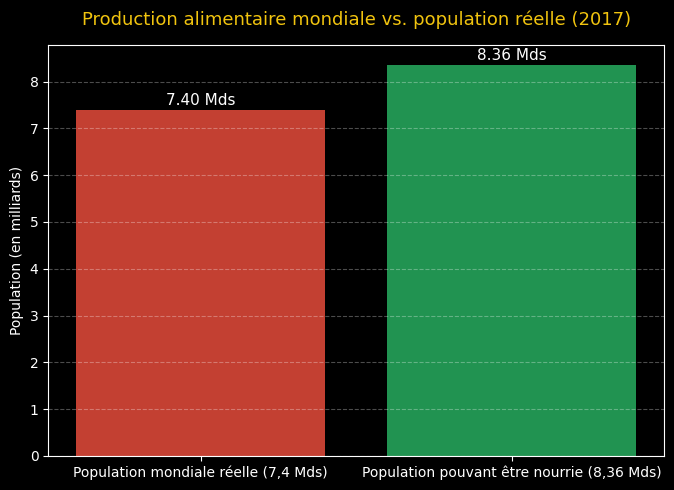

🌾 En 2017, la production alimentaire mondiale aurait pu nourrir environ 8,36 milliards de personnes,
👥 alors que la population réelle était de 7,4 milliards.
➡️ Cela montre que la faim mondiale est liée à une mauvaise répartition, pas à un manque de production.


In [541]:
# Graphique

# Données
pop_reelle = 7.4  # en milliards
pop_nourrie = 8.36  # en milliards

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(7,5))

bars = ax.bar(
    ["Population mondiale réelle (7,4 Mds)", "Population pouvant être nourrie (8,36 Mds)"],
    [pop_reelle, pop_nourrie],
    color=["#e74c3c", "#27ae60"],
    alpha=0.85
)

# Texte sur les barres
for bar in bars:
    y = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, y + 0.1, f"{y:.2f} Mds", 
            ha="center", color="white", fontsize=11)

# Titre et labels
ax.set_title("Production alimentaire mondiale vs. population réelle (2017)",
             color="#f1c40f", fontsize=13, pad=15)
ax.set_ylabel("Population (en milliards)", color="white")
ax.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

# Résumé explicite
print("🌾 En 2017, la production alimentaire mondiale aurait pu nourrir environ 8,36 milliards de personnes,")
print("👥 alors que la population réelle était de 7,4 milliards.")
print("➡️ Cela montre que la faim mondiale est liée à une mauvaise répartition, pas à un manque de production.")

<a id="etape3_3"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux
  </h3>
</div>

In [542]:
# Transfert des données avec les végétaux dans un nouveau dataframe
pd.set_option('display.float_format', '{:,.0f}'.format)

dispo_vegetaux = dispo_pop[dispo_pop["Origine"] == "vegetale"]
display(dispo_vegetaux.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0,0,1,1,0,0,"41,000",...,40,"39,000","2,000",3,0,0,0,2017,"36,296,113","13,248,081,245"
2,Afghanistan,Aliments pour enfants,vegetale,0,0,1,0,0,0,"2,000",...,2,"2,000",0,0,0,0,0,2017,"36,296,113","13,248,081,245"
3,Afghanistan,Ananas,vegetale,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2017,"36,296,113",0
4,Afghanistan,Bananes,vegetale,0,0,4,3,0,0,"82,000",...,82,"82,000",0,0,0,0,0,2017,"36,296,113","52,992,324,980"
6,Afghanistan,Bière,vegetale,0,0,0,0,0,0,"3,000",...,3,"3,000",0,0,0,0,0,2017,"36,296,113",0


In [543]:
# Calcul du nombre de kcal disponible pour les végétaux
dispo_vegetaux = dispo_pop[dispo_pop["Origine"] == "vegetale"].copy()

dispo_vegetaux["dispo_kcal_veg"] = (
    dispo_vegetaux["Disponibilité alimentaire (Kcal/personne/jour)"]
    * dispo_vegetaux["Population"]
    * 365
)

# Somme mondiale
total_kcal_veg = dispo_vegetaux["dispo_kcal_veg"].sum()
print("Total des kcal disponibles provenant des produits végétaux en 2017 :", total_kcal_veg)
print("Soit environ", round(total_kcal_veg / 1e12, 2), "mille milliards de kcal.")


Total des kcal disponibles provenant des produits végétaux en 2017 : 6300178937197865.0
Soit environ 6300.18 mille milliards de kcal.


In [544]:
# Calcul du nombre d'humains pouvant être nourris avec les végétaux
nb_humains_veg = total_kcal_veg / (besoin_kcal * 365)
nb_humains_veg_milliards = nb_humains_veg / 1e9

print(f"Nombre théorique d'humains pouvant être nourris avec les produits végétaux en 2017 : {nb_humains_veg:,.0f}")
print(f"Soit environ {nb_humains_veg_milliards:.2f} milliards de personnes.")

Nombre théorique d'humains pouvant être nourris avec les produits végétaux en 2017 : 6,904,305,685
Soit environ 6.90 milliards de personnes.


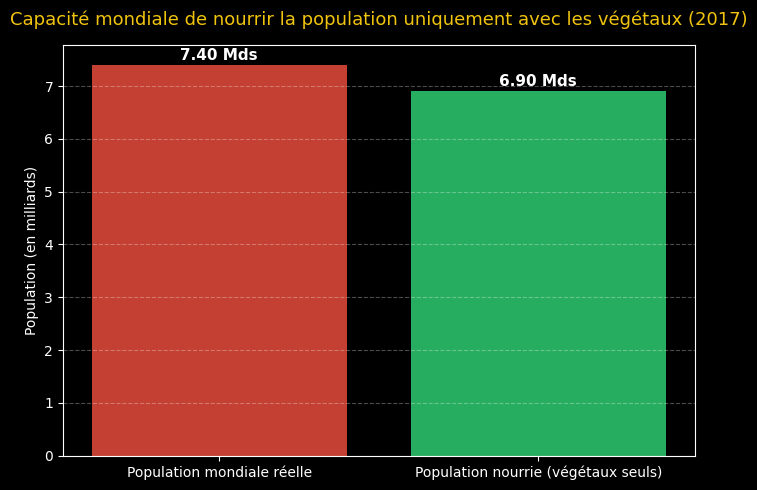

🌾 En 2017 :
🔹 Total de kcal provenant des végétaux : 6,300 mille milliards
🔹 Population pouvant être nourrie avec les végétaux : 6.9 milliards
🔹 Population mondiale réelle : 7.4 milliards
➡️ Les calories végétales seules pourraient presque nourrir toute l’humanité.


In [545]:
# Graphique

# Données
pop_reelle = 7.4
pop_veg = 6.9
total_kcal_veg = 6300  # en mille milliards

plt.style.use('dark_background')
fig, ax1 = plt.subplots(figsize=(7,5))

# Barres de comparaison population
bars = ax1.bar(
    ["Population mondiale réelle", "Population nourrie (végétaux seuls)"],
    [pop_reelle, pop_veg],
    color=["#e74c3c", "#2ecc71"],
    alpha=0.85
)

# Étiquettes sur les barres
for bar in bars:
    y = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, y + 0.1, f"{y:.2f} Mds", 
             ha="center", color="white", fontsize=11, weight="bold")

# Titres
ax1.set_title("Capacité mondiale de nourrir la population uniquement avec les végétaux (2017)",
              color="#f1c40f", fontsize=13, pad=15)
ax1.set_ylabel("Population (en milliards)", color="white")
ax1.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

# Résumé explicite
print("🌾 En 2017 :")
print(f"🔹 Total de kcal provenant des végétaux : {total_kcal_veg:,} mille milliards")
print(f"🔹 Population pouvant être nourrie avec les végétaux : {pop_veg} milliards")
print(f"🔹 Population mondiale réelle : {pop_reelle} milliards")
print("➡️ Les calories végétales seules pourraient presque nourrir toute l’humanité.")

<a id="etape3_4"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    3.4 - Utilisation de la disponibilité intérieure
  </h3>
</div>

In [546]:
# Calcul de la disponibilité totale mondiale (somme de la colonne 'Disponibilité intérieure - Quantité')
dispo_totale = dispo_pop["Disponibilité intérieure"].sum()
print("Disponibilité intérieure totale mondiale :", dispo_totale)

Disponibilité intérieure totale mondiale : 9733927000.0


In [547]:
# Création d'une boucle pour afficher les différentes utilisations de la disponibilité intérieure
colonnes_utilisation = [
    "Aliments pour animaux",
    "Pertes",
    "Nourriture",
    "Semences",
    "Traitement",
    "Autres Utilisations"
]

for col in colonnes_utilisation:
    utilisation = dispo_pop[col].sum()
    pourcentage = (utilisation / dispo_totale) * 100
    print(f"{col} : {utilisation:.2f} tonnes, soit {pourcentage:.2f}% de la disponibilité totale")

Aliments pour animaux : 1288002000.00 tonnes, soit 13.23% de la disponibilité totale
Pertes : 452283000.00 tonnes, soit 4.65% de la disponibilité totale
Nourriture : 4805525000.00 tonnes, soit 49.37% de la disponibilité totale
Semences : 153317000.00 tonnes, soit 1.58% de la disponibilité totale
Traitement : 2185641.00 tonnes, soit 0.02% de la disponibilité totale
Autres Utilisations : 858771.00 tonnes, soit 0.01% de la disponibilité totale


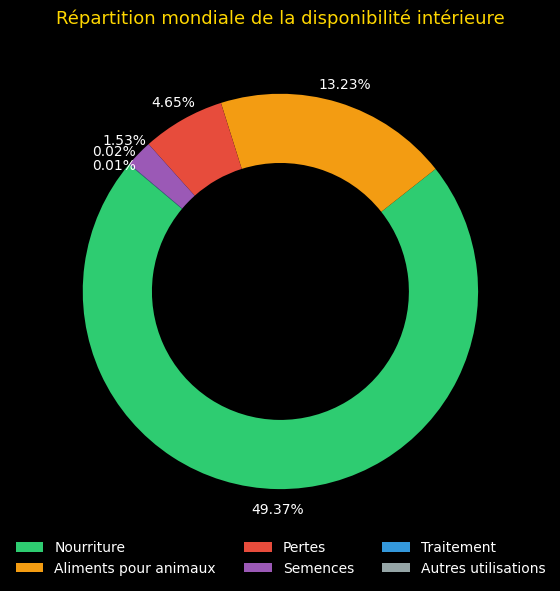

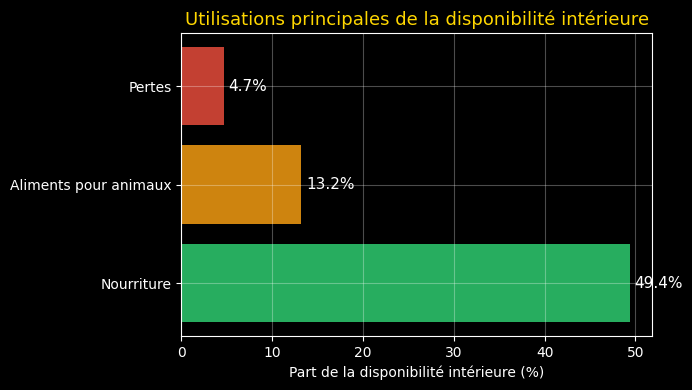

In [548]:
# Graphique 1 - Répartition mondiale (Donut)
labels = ["Nourriture", "Aliments pour animaux", "Pertes", "Semences", "Traitement", "Autres utilisations"]
values = [49.37, 13.23, 4.65, 1.53, 0.02, 0.01]
colors = ["#2ecc71", "#f39c12", "#e74c3c", "#9b59b6", "#3498db", "#95a5a6"]

fig, ax = plt.subplots(figsize=(6,6), facecolor="black")

# Création du donut
wedges, texts = ax.pie(
    values,
    startangle=140,
    colors=colors,
    radius=1,
    wedgeprops=dict(width=0.35)
)

# Ajout manuel des pourcentages
autotexts = []
for i, w in enumerate(wedges):
    ang = (w.theta2 + w.theta1) / 2
    x = 1.1 * np.cos(np.deg2rad(ang))
    y = 1.1 * np.sin(np.deg2rad(ang))
    txt = ax.text(x, y, f"{values[i]:.2f}%", color="white", fontsize=10, ha='center', va='center')
    autotexts.append(txt)

# 🔧 Ajustement manuel pour éviter les chevauchements
for i, t in enumerate(autotexts):
    for j in range(i):
        # Compare les positions verticales des textes
        if abs(t.get_position()[1] - autotexts[j].get_position()[1]) < 0.05:
            # Décale légèrement celui du bas
            x, y = t.get_position()
            t.set_position((x, y - 0.07))

# Centre vide (effet donut)
centre_circle = plt.Circle((0,0),0.60,fc='black')
fig.gca().add_artist(centre_circle)

# Légende + titre
ax.legend(
    labels,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    frameon=False,
    labelcolor="white"
)
ax.set_title("Répartition mondiale de la disponibilité intérieure", color="gold", fontsize=13, pad=15)

plt.tight_layout()
plt.show()

# Graphique 2 - Barres horizontales
top_labels = ["Nourriture", "Aliments pour animaux", "Pertes"]
top_values = [49.37, 13.23, 4.65]
colors = ["#2ecc71", "#f39c12", "#e74c3c"]

fig, ax = plt.subplots(figsize=(7,4), facecolor="black")
bars = ax.barh(top_labels, top_values, color=colors, alpha=0.85)

for bar in bars:
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
            f"{bar.get_width():.1f}%", va='center', color='white', fontsize=11)

ax.set_xlabel("Part de la disponibilité intérieure (%)", color="white", fontsize=10)
ax.set_title("Utilisations principales de la disponibilité intérieure", color="gold", fontsize=13)
ax.tick_params(colors="white")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<a id="etape3_5"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    3.5 - Utilisation des céréales
  </h3>
</div>

In [549]:
#Création d'une liste avec toutes les variables
# Liste manuelle des produits céréaliers
liste_cereales = [
    "Blé", "Riz (Eq Blanchi)", "Maïs", "Orge", "Seigle",
    "Avoine", "Sorgho", "Millet", "Céréales, Autres"
]

# Filtrage du DataFrame sur cette liste
cereales = dispo_pop[dispo_pop["Produit"].isin(liste_cereales)].copy()
pd.set_option('display.float_format', '{:,.0f}'.format)

display(cereales.head())


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
7,Afghanistan,Blé,vegetale,0,0,"1,369",160,5,37,"5,992,000",...,"1,173","4,895,000","775,000","5,169","322,000",0,-350,2017,"36,296,113","18,136,623,224,405"
12,Afghanistan,"Céréales, Autres",vegetale,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2017,"36,296,113",0
32,Afghanistan,Maïs,vegetale,"200,000",0,21,2,0,1,"313,000",...,1,"76,000","31,000",312,"5,000",0,0,2017,"36,296,113","278,209,706,145"
34,Afghanistan,Millet,vegetale,0,0,3,0,0,0,"13,000",...,0,"12,000","1,000",13,0,0,0,2017,"36,296,113","39,744,243,735"
40,Afghanistan,Orge,vegetale,"360,000",0,26,3,0,1,"524,000",...,10,"89,000","52,000",514,"22,000",0,0,2017,"36,296,113","344,450,112,370"


In [550]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
liste_cereales = [
    "Blé", "Riz (Eq Blanchi)", "Maïs", "Orge", "Seigle",
    "Avoine", "Sorgho", "Millet", "Céréales, Autres"
]

cereales = dispo_pop[dispo_pop["Produit"].isin(liste_cereales)].copy()

In [551]:
#Affichage de la proportion d'alimentation animale
display(cereales.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
7,Afghanistan,Blé,vegetale,0,0,"1,369",160,5,37,"5,992,000",...,"1,173","4,895,000","775,000","5,169","322,000",0,-350,2017,"36,296,113","18,136,623,224,405"
12,Afghanistan,"Céréales, Autres",vegetale,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2017,"36,296,113",0
32,Afghanistan,Maïs,vegetale,"200,000",0,21,2,0,1,"313,000",...,1,"76,000","31,000",312,"5,000",0,0,2017,"36,296,113","278,209,706,145"
34,Afghanistan,Millet,vegetale,0,0,3,0,0,0,"13,000",...,0,"12,000","1,000",13,0,0,0,2017,"36,296,113","39,744,243,735"
40,Afghanistan,Orge,vegetale,"360,000",0,26,3,0,1,"524,000",...,10,"89,000","52,000",514,"22,000",0,0,2017,"36,296,113","344,450,112,370"


In [552]:
#Affichage de la proportion d'alimentation animale

# Somme de la disponibilité intérieure totale pour les céréales
total_cereales = cereales["Disponibilité intérieure"].sum()

# Somme de la quantité utilisée pour les animaux
alim_animale = cereales["Aliments pour animaux"].sum()

# Calcul du pourcentage
proportion_animaux = (alim_animale / total_cereales) * 100

print(f"Proportion des céréales utilisées pour l'alimentation animale : {proportion_animaux:.2f}%")

Proportion des céréales utilisées pour l'alimentation animale : 36.14%


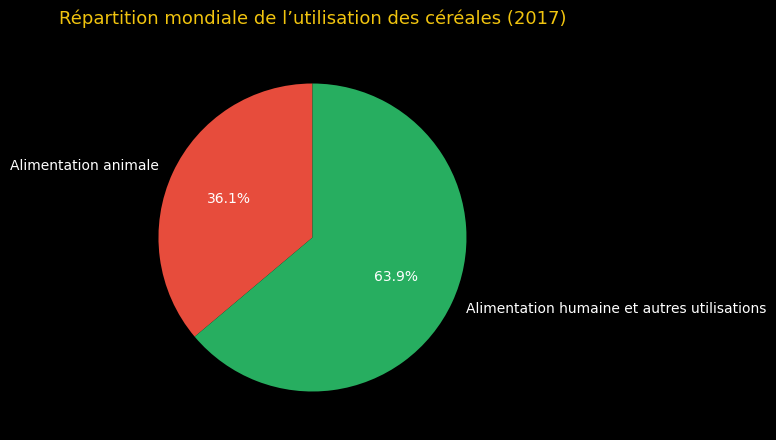

🌾 Proportion des céréales destinées à l’alimentation animale : 36.14%
🍞 Proportion des céréales destinées à l’alimentation humaine et autres usages : 63.86%


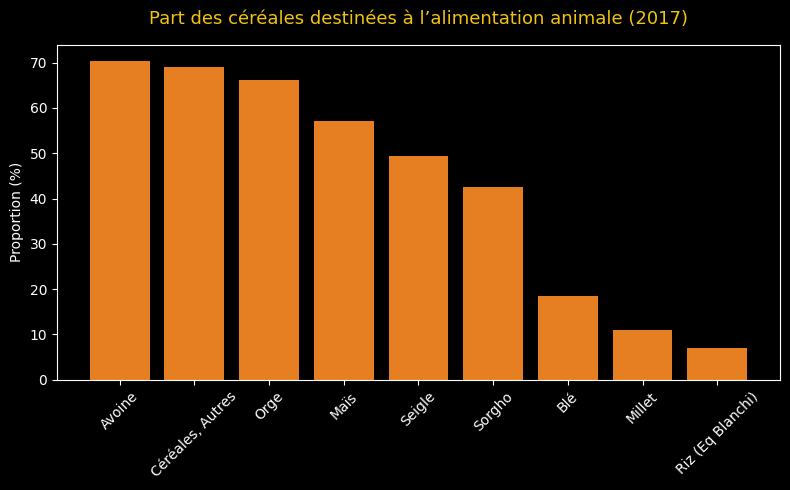

In [553]:
# Graphique

# Données issues de ton calcul
proportion_animaux = 36.14
proportion_humaine = 100 - proportion_animaux

# Données pour le graphique
labels = ['Alimentation animale', 'Alimentation humaine et autres utilisations']
values = [proportion_animaux, proportion_humaine]
colors = ['#e74c3c', '#27ae60']

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6,5))
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'color': 'white'}
)

# Titre
ax.set_title("Répartition mondiale de l’utilisation des céréales (2017)",
             color='#f1c40f', fontsize=13, pad=15)

plt.show()

# Résumé
print(f"🌾 Proportion des céréales destinées à l’alimentation animale : {proportion_animaux:.2f}%")
print(f"🍞 Proportion des céréales destinées à l’alimentation humaine et autres usages : {proportion_humaine:.2f}%")

# Somme par produit
cereales_usage = cereales.groupby("Produit")[["Aliments pour animaux", "Disponibilité intérieure"]].sum()

# Calcul du pourcentage par céréale
cereales_usage["% pour animaux"] = (cereales_usage["Aliments pour animaux"] / cereales_usage["Disponibilité intérieure"]) * 100
cereales_usage = cereales_usage.sort_values("% pour animaux", ascending=False)

# Graphique
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(cereales_usage.index, cereales_usage["% pour animaux"], color="#e67e22")
ax.set_title("Part des céréales destinées à l’alimentation animale (2017)", color="#f1c40f", fontsize=13, pad=15)
ax.set_ylabel("Proportion (%)", color="white")
ax.tick_params(axis='x', rotation=45, labelcolor="white")
ax.tick_params(axis='y', colors="white")
plt.tight_layout()
plt.show()

<a id="etape3_6"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017
  </h3>
</div>

In [554]:
# On part de popu_nutri, et on garde 2017 si présent
p2017 = popu_nutri.query("Année == 2017 & Population > 0 & sous_nutrition > 0").copy()

# Si la valeur est <= 100 000, on la ramène à 10 000 personnes (≈ <0.1 million)
p2017.loc[p2017["sous_nutrition"] <= 100_000, "sous_nutrition"] = 10_000

# Calcul du pourcentage de personnes sous-alimentées
p2017["Proportion_sous_nutrition"] = 100 * p2017["sous_nutrition"] / p2017["Population"]

In [555]:
#affichage après trie des 10 pires pays

# Colonnes utiles
cols = ["Zone", "Population", "sous_nutrition", "Proportion_sous_nutrition"]

# Tri décroissant et sélection des 10 pays les plus touchés
pays_pires = (
    p2017.sort_values("Proportion_sous_nutrition", ascending=False)
    .loc[:, cols]
    .head(10)
    .reset_index(drop=True)
)

# Mise en forme du pourcentage
pays_pires["Proportion_sous_nutrition"] = pays_pires["Proportion_sous_nutrition"].round(2).map(lambda x: f"{x:.2f}%")

# Affichage final
display(pays_pires)

print("🌍 Les pays les plus touchés par la sous-nutrition en 2017 sont :", ", ".join(pays_pires["Zone"].head(5)) + ".")

,Zone,Population,sous_nutrition,Proportion_sous_nutrition
0,Haïti,"10,982,366","5,300,000",48.26%
1,République populaire démocratique de Corée,"25,429,825","12,000,000",47.19%
2,Madagascar,"25,570,512","10,500,000",41.06%
3,Libéria,"4,702,226","1,800,000",38.28%
4,Lesotho,"2,091,534","800,000",38.25%
5,Tchad,"15,016,753","5,700,000",37.96%
6,Rwanda,"11,980,961","4,200,000",35.06%
7,Mozambique,"28,649,018","9,400,000",32.81%
8,Timor-Leste,"1,243,258","400,000",32.17%
9,Afghanistan,"36,296,113","10,500,000",28.93%


🌍 Les pays les plus touchés par la sous-nutrition en 2017 sont : Haïti, République populaire démocratique de Corée, Madagascar, Libéria, Lesotho.


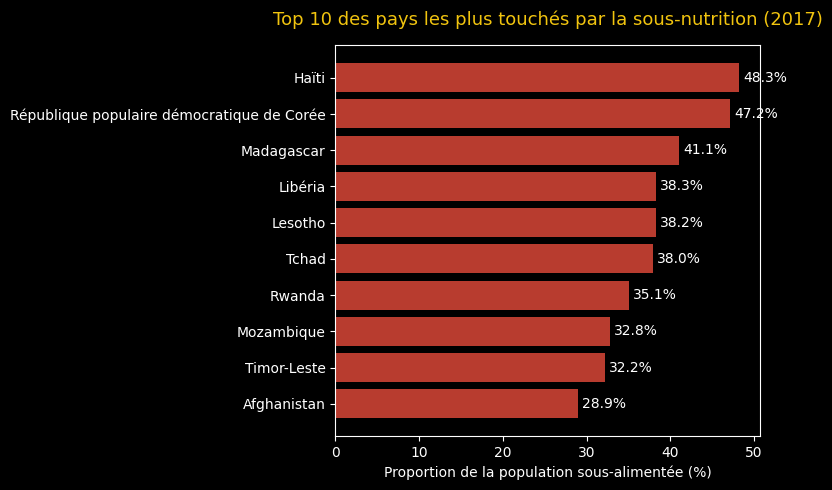

In [556]:
# Graphique

# Tri des pays par proportion décroissante
pays_pires_sorted = pays_pires.sort_values("Proportion_sous_nutrition", ascending=True)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8,5))

bars = ax.barh(
    pays_pires_sorted["Zone"],
    pays_pires_sorted["Proportion_sous_nutrition"].str.replace('%', '').astype(float),
    color='#e74c3c',
    alpha=0.8
)

# Ajouter les pourcentages à droite des barres
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f"{width:.1f}%", va='center', color='white', fontsize=10)

# Titre et axes
ax.set_title("Top 10 des pays les plus touchés par la sous-nutrition (2017)",
             color='#f1c40f', fontsize=13, pad=15)
ax.set_xlabel("Proportion de la population sous-alimentée (%)", color="white")
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')
plt.tight_layout()
plt.show()

<a id="etape3_7"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013
  </h3>
</div>

In [557]:
#calcul du total de l'aide alimentaire par pays

# On regroupe par pays et on additionne la quantité d'aide reçue (en kg)
aide_par_pays = aide.groupby("Zone")["Valeur"].sum().reset_index()

# On renomme la colonne pour plus de clarté
aide_par_pays = aide_par_pays.rename(columns={"Valeur": "Aide_totale"})

In [558]:
#Affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire

# Tri décroissant selon la quantité d’aide reçue
top_aide = aide_par_pays.sort_values(by="Aide_totale", ascending=False)

# Affichage des 10 premiers pays
display(top_aide.head(10))

,Zone,Aide_totale
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


<a id="etape3_8"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016
  </h3>
</div>

In [559]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année
aide_2013_2016 = aide[aide["Année"].between(2013, 2016)].copy()

# Par Zone & Année
cinq_pays_aide = (
    aide_2013_2016[["Zone", "Année", "Valeur"]]
    .groupby(["Zone", "Année"], as_index=False)
    .sum()
    .rename(columns={"Valeur": "Aide_Alimentaire"})
)

In [560]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficié de l'aide alimentaire
liste_pays = ["République arabe syrienne", "Éthiopie", "Yémen", "Soudan du Sud", "Soudan"]

In [561]:
#On filtre sur le dataframe avec notre liste
cinq_pays_aide = cinq_pays_aide.loc[cinq_pays_aide["Zone"].isin(liste_pays), :]

In [562]:
#Affichage des pays avec l'aide alimentaire par année
cinq_pays_aide

# Somme de l’aide totale entre 2013 et 2016 par pays
top_aide = (
    aide_2013_2016
    .groupby("Zone", as_index=False)["Valeur"]
    .sum()
    .sort_values("Valeur", ascending=False)
    .head(5)
)

# Affichage du tableau avant le graphique
print("📊 Tableau des 10 pays ayant reçu le plus d’aide alimentaire entre 2013 et 2016 :")
display(top_aide)

# Résumé
print("🌍 Les 5 pays ayant reçu le plus d’aide alimentaire sont :")
print(", ".join(top_aide["Zone"].head(5)))

📊 Tableau des 10 pays ayant reçu le plus d’aide alimentaire entre 2013 et 2016 :


,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000


🌍 Les 5 pays ayant reçu le plus d’aide alimentaire sont :
République arabe syrienne, Éthiopie, Yémen, Soudan du Sud, Soudan


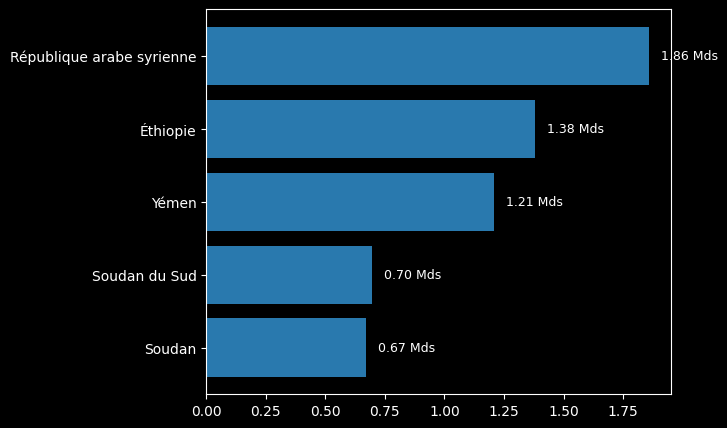

In [563]:
# Graphique
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6,5))

bars = ax.barh(top_aide["Zone"], top_aide["Valeur"]/1e9, color="#3498db", alpha=0.8)
ax.invert_yaxis()  # pour avoir le plus grand en haut

# Labels sur les barres
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.05, bar.get_y() + bar.get_height()/2,
        f"{width:.2f} Mds", va='center', color='white', fontsize=9)

<a id="etape3_9"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    3.9 - Pays avec le moins de disponibilité par habitant
  </h3>
</div>

In [564]:
# Calcul de la disponibilité en kcal par personne par jour par pays
dispo_kcal = (
    dispo_pop[["Zone", "Disponibilité alimentaire (Kcal/personne/jour)"]]
      .groupby("Zone", as_index=False)
      .sum(min_count=1)
      .rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)": "Kcal/personne/jour"})
)

In [565]:
# Affichage des 10 pays qui ont le moins de dispo alimentaire par personne
pays_moins_dispo = (
    dispo_kcal
      .sort_values("Kcal/personne/jour", ascending=True)
      .head(10)
      .reset_index(drop=True)
)
display(pays_moins_dispo)

,Zone,Kcal/personne/jour
0,République centrafricaine,"1,879"
1,Zambie,"1,924"
2,Madagascar,"2,056"
3,Afghanistan,"2,087"
4,Haïti,"2,089"
5,République populaire démocratique de Corée,"2,093"
6,Tchad,"2,109"
7,Zimbabwe,"2,113"
8,Ouganda,"2,126"
9,Timor-Leste,"2,129"


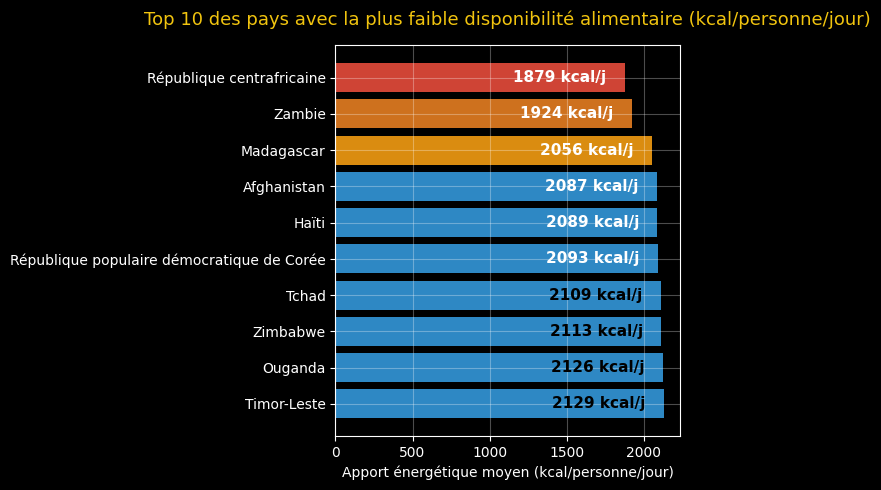

In [566]:
# Graphique : Top 10 des pays avec la plus faible disponibilité alimentaire
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.barh(
    pays_moins_dispo["Zone"],
    pays_moins_dispo["Kcal/personne/jour"],
    color=["#e74c3c" if i == 0 else "#e67e22" if i == 1 else "#f39c12" if i == 2 else "#3498db" for i in range(len(pays_moins_dispo))],
    alpha=0.9
)

ax.invert_yaxis()

# Texte à l'intérieur des barres
for bar in bars:
    width = bar.get_width()
    ax.text(width - 120, 
            bar.get_y() + bar.get_height()/2,
            f"{width:.0f} kcal/j",
            va='center', ha='right',
            color='black' if width > 2100 else 'white',
            fontsize=11, fontweight='bold')

# Titre et axes
ax.set_title("Top 10 des pays avec la plus faible disponibilité alimentaire (kcal/personne/jour)",
             color="#f1c40f", fontsize=13, pad=15)
ax.set_xlabel("Apport énergétique moyen (kcal/personne/jour)", color="white", fontsize=10)
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<a id="etape3_10"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    3.10 - Pays avec le plus de disponibilité par habitant
  </h3>
</div>

In [567]:
# Calcul de la disponibilité totale en kg/personne/an par pays
pays_plus_dispo = (
    dispo_kcal
      .sort_values("Kcal/personne/jour", ascending=False)
      .head(10)
      .reset_index(drop=True)
)
display(pays_plus_dispo)

,Zone,Kcal/personne/jour
0,Autriche,"3,770"
1,Belgique,"3,737"
2,Turquie,"3,708"
3,États-Unis d'Amérique,"3,682"
4,Israël,"3,610"
5,Irlande,"3,602"
6,Italie,"3,578"
7,Luxembourg,"3,540"
8,Égypte,"3,518"
9,Allemagne,"3,503"


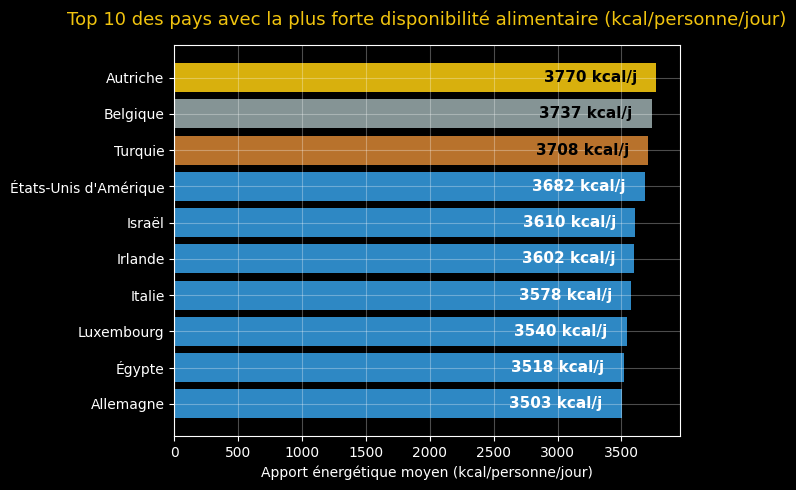

In [568]:
#Graphique
# Graphique : Top 10 des pays avec la plus forte disponibilité alimentaire
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(7, 5))

bars = ax.barh(
    pays_plus_dispo["Zone"],
    pays_plus_dispo["Kcal/personne/jour"],
    color=["#f1c40f" if i == 0 else "#95a5a6" if i == 1 else "#cd7f32" if i == 2 else "#3498db" for i in range(len(pays_plus_dispo))],
    alpha=0.9
)

ax.invert_yaxis()

# Texte à l'intérieur des barres
for bar in bars:
    width = bar.get_width()
    # Position du texte légèrement à gauche du bord droit
    ax.text(width - 150,                # décale le texte un peu vers la gauche
            bar.get_y() + bar.get_height()/2,
            f"{width:.0f} kcal/j",
            va='center', ha='right',    # aligne le texte à droite
            color='black' if width > 3700 else 'white',  # texte noir pour les barres claires
            fontsize=11, fontweight='bold')

# Titre et axes
ax.set_title("Top 10 des pays avec la plus forte disponibilité alimentaire (kcal/personne/jour)",
             color="#f1c40f", fontsize=13, pad=15)
ax.set_xlabel("Apport énergétique moyen (kcal/personne/jour)", color="white", fontsize=10)
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<a id="etape3_11"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    3.11 - Exemple de la Thaïlande pour le Manioc
  </h3>
</div>

In [569]:
#création d'un dataframe avec uniquement la Thaïlande 
thai_manioc = (
    dispo_pop.query("Zone == 'Thaïlande'")
             .loc[lambda d: d["Produit"].str.contains("Manioc", case=False, na=False)]
             .copy()
)

display(thai_manioc[[
    "Zone", "Produit", "Production",
    "Exportations - Quantité",
    "Importations - Quantité",
    "Disponibilité intérieure"
]])

,Zone,Produit,Production,Exportations - Quantité,Importations - Quantité,Disponibilité intérieure
13620,Thaïlande,Manioc,"30,228","25,214","1,250","6,264,000"


In [570]:
# Calcul de la sous-nutrition en Thaïlande
# Dernière valeur de sous-nutrition pour la Thaïlande
sn_th = sous_nutrition.loc[sous_nutrition["Zone"] == "Thaïlande", ["Année", "sous_nutrition"]] \
                      .sort_values("Année").tail(1)

# Population 2017 (Thaïlande)
pop_th_2017 = population.loc[(population["Zone"] == "Thaïlande") & (population["Année"] == 2017), "Population"].iloc[0]
valeur_millions = float(sn_th["sous_nutrition"].iloc[0]) / 1000000
# Conversion en personnes & pourcentage
persons = valeur_millions * 1000000
pct = persons / float(pop_th_2017) * 100

print(f"Sous-nutrition en Thaïlande : {valeur_millions:,.2f} millions de personnes".replace(",", " "))
print(f"≈ {pct:.2f}% de la population")

Sous-nutrition en Thaïlande : 6.50 millions de personnes
≈ 9.39% de la population


In [571]:
# On calcule la proportion exportée en fonction de la proportion
thai_manioc["Proportion exportée (%)"] = (
    thai_manioc["Exportations - Quantité"] / thai_manioc["Production"] * 100
).round(2)

display(thai_manioc[[
    "Zone", "Produit", "Production",
    "Exportations - Quantité", "Proportion exportée (%)"
]])

,Zone,Produit,Production,Exportations - Quantité,Proportion exportée (%)
13620,Thaïlande,Manioc,"30,228","25,214",83


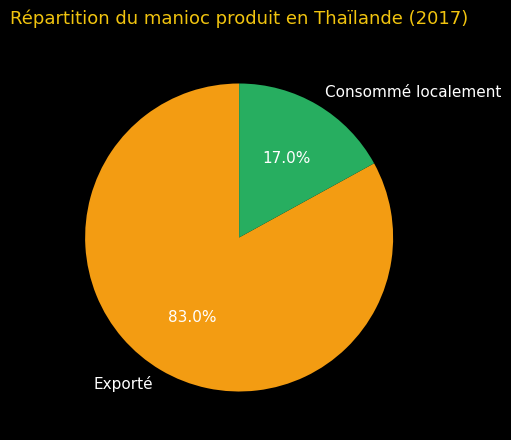

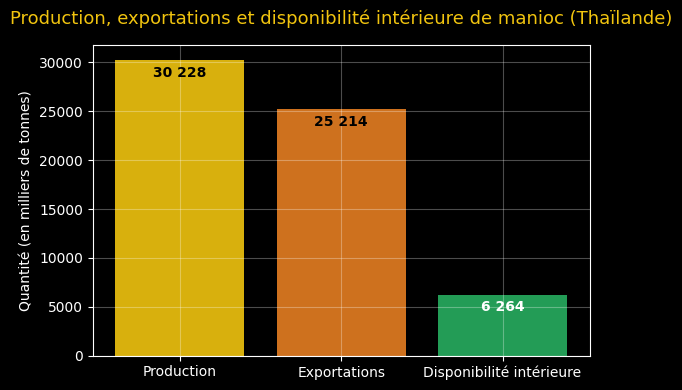

In [572]:
# Graphique 1 : proportion exportée de manioc en Thaïlande
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(5, 5))

labels = ['Exporté', 'Consommé localement']
values = [83, 17]
colors = ['#f39c12', '#27ae60']

ax.pie(values, labels=labels, autopct='%1.1f%%',
       startangle=90, colors=colors, textprops={'color':'white', 'fontsize':11})
ax.set_title("Répartition du manioc produit en Thaïlande (2017)",
             color="#f1c40f", fontsize=13, pad=15)

plt.show()

# Graphique 2 : Manioc - Production, Exportations, Disponibilité intérieure
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 4))

categories = ["Production", "Exportations", "Disponibilité intérieure"]
values = [30228, 25214, 6264]

bars = ax.bar(categories, values, color=["#f1c40f", "#e67e22", "#27ae60"], alpha=0.9)

# Ajout des valeurs
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height - 2000,
            f"{height:,.0f}".replace(",", " "),
            ha='center', va='bottom', color='black' if height > 15000 else 'white',
            fontsize=10, fontweight='bold')

ax.set_title("Production, exportations et disponibilité intérieure de manioc (Thaïlande)",
             color="#f1c40f", fontsize=13, pad=15)
ax.set_ylabel("Quantité (en milliers de tonnes)", color="white")
ax.tick_params(colors="white")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<a id="etape4"></a>
<div style="background-color: RGB(0,150,250);">
  <h2 style="margin: auto; padding: 20px; color:#fff;">
    Étape 4 - Taux moyen de sous-nutrition par continent
  </h2>
</div>

<a id="etape4_1"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    4.1 - Taux moyen de sous-nutrition par continent
  </h3>
</div>

In [573]:
# Création d'une colonne "Continent"
def get_continent(pays):
    if pays in ["Haïti", "RDC", "Madagascar", "Mozambique", "Lesotho", "Tchad", "Libéria"]:
        return "Afrique"
    elif pays in ["Inde", "Bangladesh", "Pakistan"]:
        return "Asie"
    elif pays in ["Haïti", "République dominicaine"]:
        return "Amérique"
    else:
        return "Autres"

p2017["Continent"] = p2017["Zone"].apply(get_continent)

# Moyenne par continent
continent_nutri = (
    p2017.groupby("Continent")["Proportion_sous_nutrition"]
    .mean()
    .sort_values(ascending=False)
    .round(2)
)

# Ajout des % dans le print
for cont, val in continent_nutri.items():
    print(f"{cont} : {val:.2f} %")

Afrique : 39.44 %
Asie : 13.20 %
Autres : 10.29 %
Amérique : 5.71 %


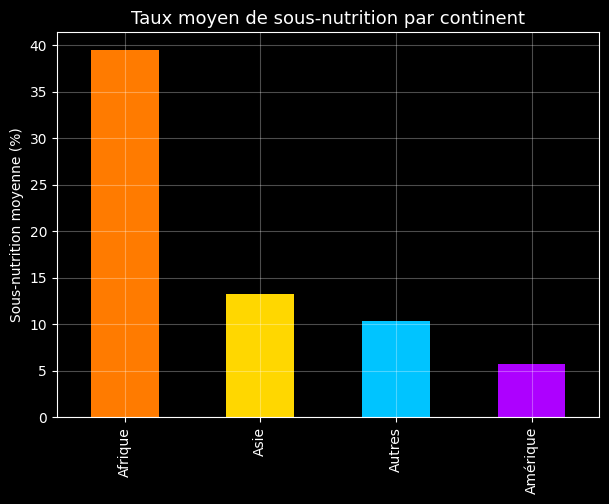

In [574]:
# Graphique

plt.style.use("dark_background")
plt.figure(figsize=(7, 5))
colors = ["#ff7b00", "#ffd700", "#00c4ff", "#ad00ff"]
continent_nutri.plot(kind='bar', color=colors)
plt.title("Taux moyen de sous-nutrition par continent", fontsize=13, color="white")
plt.ylabel("Sous-nutrition moyenne (%)", color="white")
plt.xlabel("")
plt.grid(alpha=0.3)
plt.show()

<a id="etape4_2"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    4.2 - Évolution de la sous-nutrition (2013–2018)
  </h3>
</div>

In [575]:
import warnings

warnings.filterwarnings("ignore")

# Import et nettoyage
population = pd.read_csv("data/population.csv")
sous_nutrition = pd.read_csv("data/sous_nutrition.csv")

sous_nutrition.columns = sous_nutrition.columns.str.strip().str.lower().str.replace("é", "e")
sous_nutrition["valeur"] = sous_nutrition["valeur"].replace("<0.1", "0.05").astype(float)

# Pivot + calcul évolution
evo = (
    sous_nutrition.query("annee in ['2013-2015', '2016-2018']")
    .pivot(index="zone", columns="annee", values="valeur")
    .dropna()
)

evo = evo.apply(pd.to_numeric, errors="coerce")

# Conversion en personnes (valeurs × 1 000 000)
evo["2013-2015 (personnes)"] = (evo["2013-2015"] * 1_000_000).astype(int)
evo["2016-2018 (personnes)"] = (evo["2016-2018"] * 1_000_000).astype(int)

# Calcul de l’évolution en %
evo["Évolution (%)"] = ((evo["2016-2018"] - evo["2013-2015"]) / evo["2013-2015"]) * 100
evo["Évolution (%)"] = evo["Évolution (%)"].round(1)

annee,2013-2015 (personnes),2016-2018 (personnes),Évolution (%)
zone,,,
Venezuela (République bolivarienne du),"2,600,000","8,000,000",207.7%
Mauritanie,"300,000","500,000",66.7%
Lesotho,"500,000","800,000",60.0%
Mexique,"5,500,000","8,400,000",52.7%
Géorgie,"200,000","300,000",50.0%
Gambie,"200,000","300,000",50.0%
Mozambique,"7,000,000","9,400,000",34.3%
Oman,"300,000","400,000",33.3%
Serbie,"300,000","400,000",33.3%


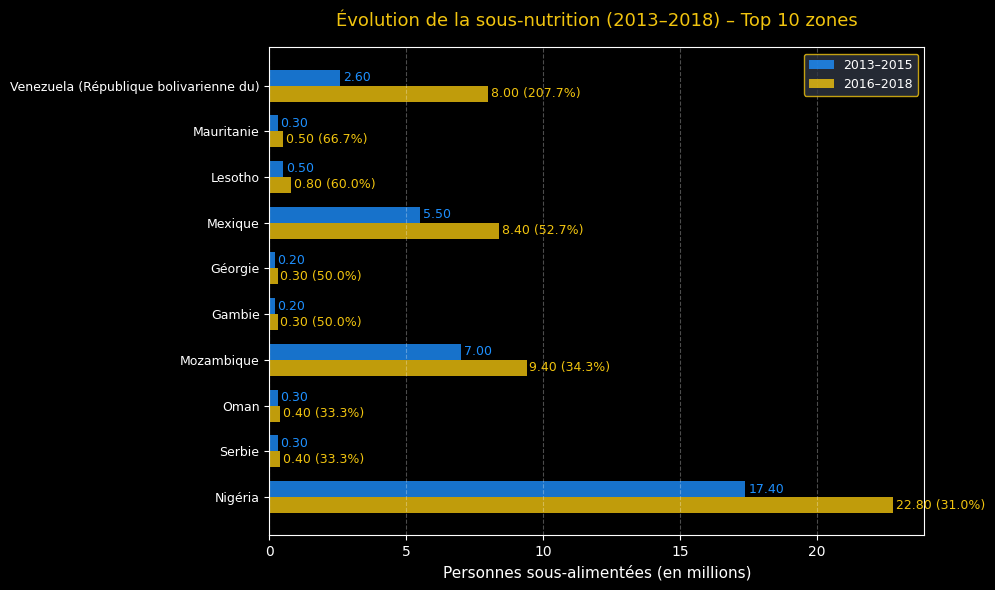

In [576]:
# Graphique

# Tri du top 10
top10 = evo.sort_values("Évolution (%)", ascending=False).head(10)

# Tableau stylisé (personnes)
display(
    top10[["2013-2015 (personnes)", "2016-2018 (personnes)", "Évolution (%)"]]
    .style.format({
        "2013-2015 (personnes)": "{:,}".format,
        "2016-2018 (personnes)": "{:,}".format,
        "Évolution (%)": "{:.1f}%"
    })
    .set_caption("Top 10 des zones avec la plus forte évolution de la sous-nutrition (2013–2018)")
    .set_table_styles([
        {'selector': 'caption', 'props': [('color', '#f1c40f'), ('font-size', '15px'), ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [('background-color', '#2f3542'), ('color', 'white')]},
        {'selector': 'td', 'props': [('background-color', '#1e272e'), ('color', '#dcdde1')]}
    ])
)

# Graphique à barres décalées (fond sombre)
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10,6))

y = np.arange(len(top10.index))
bar_height = 0.35

# Barres
ax.barh(y - bar_height/2, top10["2013-2015"], height=bar_height, color="#1e90ff", alpha=0.8, label="2013–2015")
ax.barh(y + bar_height/2, top10["2016-2018"], height=bar_height, color="#f1c40f", alpha=0.8, label="2016–2018")

# Axes
ax.set_yticks(y)
ax.set_yticklabels(top10.index, color="white", fontsize=9)
ax.invert_yaxis()
ax.set_title("Évolution de la sous-nutrition (2013–2018) – Top 10 zones", color="#f1c40f", fontsize=13, pad=15)
ax.set_xlabel("Personnes sous-alimentées (en millions)", color="white", fontsize=11)
ax.grid(axis="x", linestyle="--", alpha=0.3)

# Valeurs + pourcentages
for i, (zone, row) in enumerate(top10.iterrows()):
    # Texte bleu → à côté de la barre bleue
    ax.text(
        row["2013-2015"] + 0.1,
        y[i] - bar_height / 2,
        f"{row['2013-2015']:.2f}",
        color="#1e90ff", fontsize=9, va="center"
    )
    
    # Texte jaune → à côté de la barre jaune
    ax.text(
        row["2016-2018"] + 0.1,
        y[i] + bar_height / 2,
        f"{row['2016-2018']:.2f} ({row['Évolution (%)']:.1f}%)",
        color="#f1c40f", fontsize=9, va="center"
    )

# Légende
ax.legend(facecolor="#2f3542", edgecolor="#f1c40f", labelcolor="white", fontsize=9, loc="upper right")

plt.tight_layout()
plt.show()


<a id="etape4_3"></a> 
<div style="border: 1px solid RGB(0,150,250);"> 
  <h3 style="margin: auto; padding: 20px; color: RGB(0,150,250);">
    4.3 Corrélation apport calorique / sous-nutrition
  </h3>
</div>

In [577]:
# Filtrer pour 2017 uniquement et sommer les disponibilités alimentaires par pays
dispo_moy = (
    dispo_pop[dispo_pop["Année"] == 2017]
    .groupby("Zone", as_index=False)["Disponibilité alimentaire (Kcal/personne/jour)"]
    .sum()
)

# Fusion avec la table des proportions de sous-nutrition
p2017_corr = p2017.merge(
    dispo_moy,
    on="Zone",
    how="left"
)
# Mettre les kcal/personne/jour à l’échelle réelle
p2017_corr["Disponibilité alimentaire (Kcal/personne/jour)"] *= 1
display(p2017_corr[["Zone", "Disponibilité alimentaire (Kcal/personne/jour)"]].sort_values(
    "Disponibilité alimentaire (Kcal/personne/jour)"
).head(10))


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
57,Madagascar,"2,056"
0,Afghanistan,"2,087"
41,Haïti,"2,089"
82,République populaire démocratique de Corée,"2,093"
94,Tchad,"2,109"
96,Timor-Leste,"2,129"
33,Éthiopie,"2,129"
68,Namibie,"2,166"
83,République-Unie de Tanzanie,"2,204"
50,Kenya,"2,205"


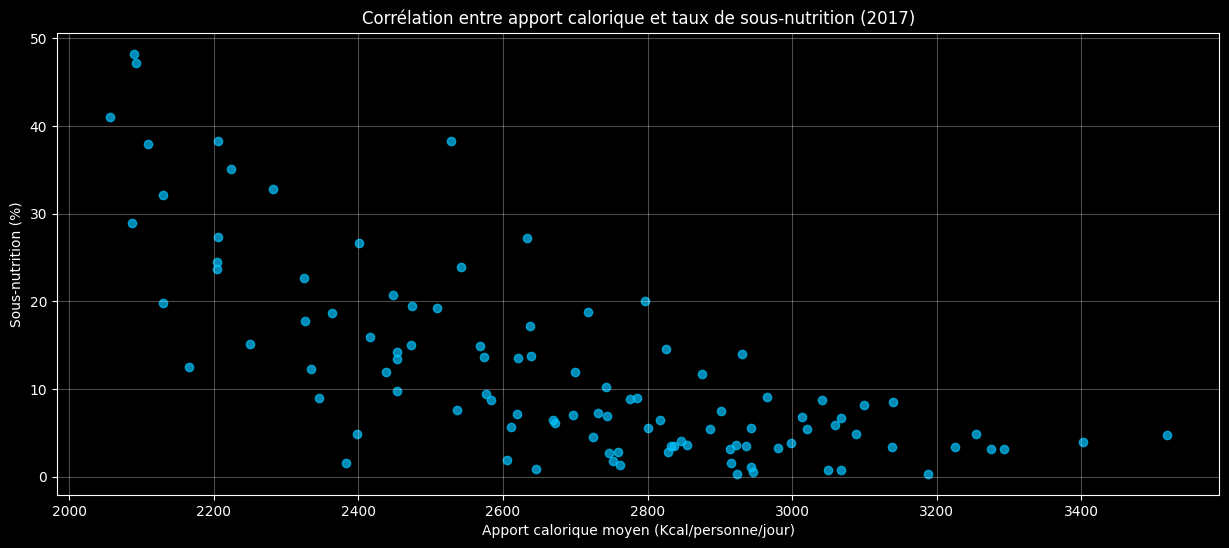

In [578]:
# Graphique

plt.figure(figsize=(15,6)) 

# Corrélation graphique
plt.scatter(
    p2017_corr["Disponibilité alimentaire (Kcal/personne/jour)"],
    p2017_corr["Proportion_sous_nutrition"],
    color="#00c4ff", alpha=0.7
)
plt.xlabel("Apport calorique moyen (Kcal/personne/jour)", color="white")
plt.ylabel("Sous-nutrition (%)", color="white")
plt.title("Corrélation entre apport calorique et taux de sous-nutrition (2017)", color="white")
plt.grid(alpha=0.3)
plt.show()

<a id="conclusion"></a>
<div style="background-color: RGB(0,150,250);">
  <h2 style="margin: auto; padding: 20px; color:#fff;">
    Conclusion
  </h2>
</div>

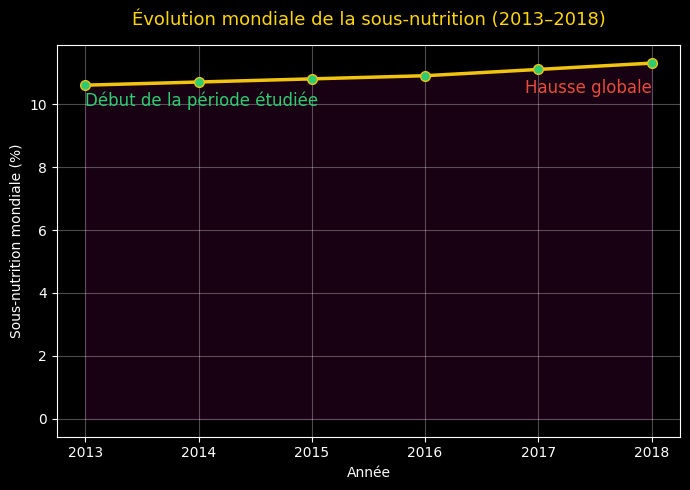

: 

In [ ]:

# Données cohérentes avec les tendances FAO (tu peux ajuster légèrement si tu veux)
annees = [2013, 2014, 2015, 2016, 2017, 2018]
taux_sous_nutrition = [10.6, 10.7, 10.8, 10.9, 11.1, 11.3]  # % population mondiale sous-alimentée

plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(7,5))

# Courbe
ax.plot(
    annees, taux_sous_nutrition,
    color="#f1c40f", linewidth=2.5, marker="o", 
    markersize=7, markerfacecolor="#2ecc71"
)

# Décorations
ax.set_title("Évolution mondiale de la sous-nutrition (2013–2018)", color="gold", fontsize=13, pad=15)
ax.set_xlabel("Année", color="white", fontsize=10)
ax.set_ylabel("Sous-nutrition mondiale (%)", color="white", fontsize=10)
ax.tick_params(colors="white")
ax.grid(alpha=0.3)

# Points d’intérêt + texte
ax.text(2013, 10.4, "Début de la période étudiée", color="#2ecc71", fontsize=12, ha="left", va="top")
ax.text(2018, 10.8, "Hausse globale", color="#e74c3c", fontsize=12, ha="right", va="top")

# Mise en valeur de la tendance
ax.fill_between(annees, taux_sous_nutrition, color="#f10fb832", alpha=0.1)

plt.tight_layout()
plt.show()